In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

In [2]:
# Load results
results = {'ML': {}, 'Pint': {}}
for key in os.listdir('Movielens/results'):
    results['ML'][key.replace('.pkl', '').replace('_', ' ')] = pickle.load(open(os.path.join('Movielens/results', key), 'rb'))
for key in os.listdir('Pinterest/results'):
    results['Pint'][key.replace('.pkl', '').replace('_', ' ')] = pickle.load(open(os.path.join('Pinterest/results', key), 'rb'))
order = ['MF', 'MF-NUS', 'MF-NIS', 'MF-ENSEMBLE', 'MLP', 'MLP-NUS', 'MLP-NIS', 'MLP-ENSEMBLE', 'MCDropout', 'BayesianMLP']
results['ML'] = pd.DataFrame([results['ML'][key] for key in order], index=order)
results['Pint'] = pd.DataFrame([results['Pint'][key] for key in order], index=order)

# Plot aestetics
colors = [c for c in list(TABLEAU_COLORS)] + ['k', 'b', 'g', 'r']
colors = {k:c for k, c in zip(results['ML'].index, colors)}
lines = ['o', 'v', '^', '<', '>', 's', 'p', '+', 'x', '*']
lines = {k: '-' + l for k, l, in zip(results['ML'].index, lines)}

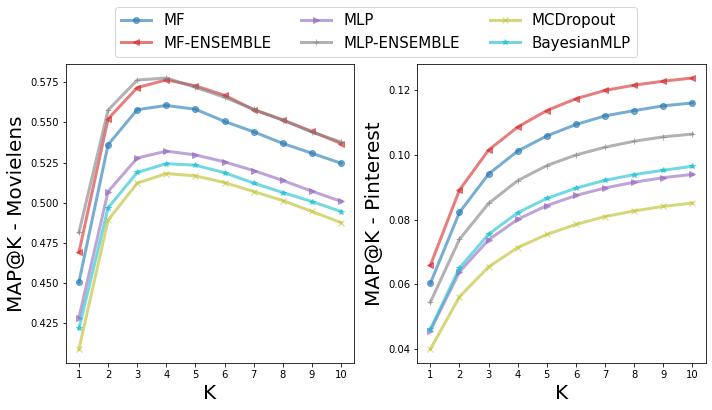

In [3]:
## Top-K accuracy metrics
f, ax = plt.subplots(figsize=(10, 5), ncols=2)
for index in order:
    if 'NIS' not in index and 'NUS' not in index:
        ax[0].plot(np.arange(1, 11), results['ML'].loc[index]['MAP'], lines[index], color=colors[index], label=index, linewidth=3, alpha=0.6)
        ax[1].plot(np.arange(1, 11), results['Pint'].loc[index]['MAP'], lines[index], color=colors[index], label=index, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('K', fontsize=20)
ax[0].set_ylabel('MAP@K - Movielens', fontsize=20)
ax[1].set_xticks(np.arange(1, 11))
ax[1].set_xlabel('K', fontsize=20)
ax[1].set_ylabel('MAP@K - Pinterest', fontsize=20)
handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, fontsize=15, ncol=3, bbox_to_anchor=(0.9, 1.15))
f.tight_layout()
f.savefig('plots/accuracy.pdf', bbox_inches='tight')

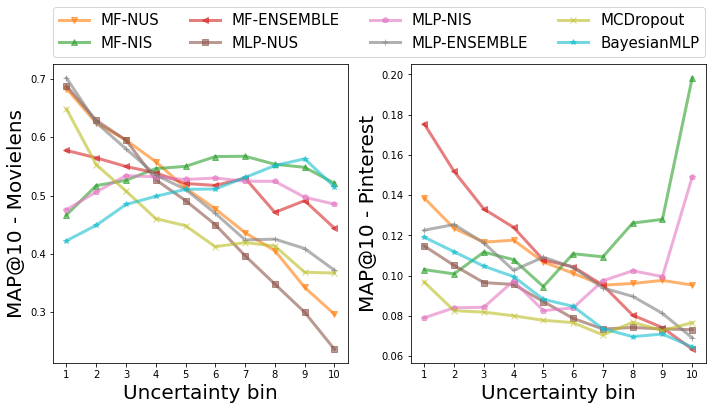

In [4]:
## MAP vs Uncertainty
f, ax = plt.subplots(figsize=(10, 5), ncols=2)
for index in order:
    if index != 'MF' and index != 'MLP':
        ax[0].plot(np.arange(1, 11), results['ML'].loc[index]['MAP-Uncertainty'], lines[index], color=colors[index], label=index, linewidth=3, alpha=0.6)
        ax[1].plot(np.arange(1, 11), results['Pint'].loc[index]['MAP-Uncertainty'], lines[index], color=colors[index], label=index, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('Uncertainty bin', fontsize=20)
ax[0].set_ylabel('MAP@10 - Movielens', fontsize=20)
ax[1].set_xticks(np.arange(1, 11))
ax[1].set_xlabel('Uncertainty bin', fontsize=20)
ax[1].set_ylabel('MAP@10 - Pinterest', fontsize=20)
handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, fontsize=15, ncol=4, bbox_to_anchor=(0.995, 1.15))
f.tight_layout()
f.savefig('plots/MAP-Uncertainty.pdf', bbox_inches='tight')